In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle
import scipy.stats as stats 

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import torch.nn as nn

In [2]:

data = pd.read_csv("Dataset/train_100r.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414



<p style="text-align: justify "> 
    Dataset provided has various features that describe breast cancer as malignant or benign. Provided are 25524 records and 30 elements that define the output dependent variable.
</p>

We may have a better grasp of each column and the sort of data it contains by reading the sections below:
<ol>   
<li>ID Number:</li> The serial number of each record in the dataset is stored in this integer type field.
<li>Diagnosis:</li> This column contains our tagged data on whether a doctor diagnosed the patient was diagnosed with breast cancer, with "M" representing a malignant cancer cell and "B" representing tumour cells.
<li>Radius:</li> This column of type integer contains information on each patient's cancer cell at the time of therapy. The radius is the average of the distances between the centre and the points on the periphery.
<li>Texture:</li> This integer type column contains information on the texture of each patient's cancer cells at the time of therapy. The standard deviation of grey-scale values is known as texture.
<li>Perimeter:</li> At the time of therapy, this column of type integer holds information on the perimeter of each patient's cancer cell.
<li>Area:</li> This column of type integer contains information on the area of each cancer cell at the time of therapy.
<li>Smoothness:</li> This integer type column offers local variation in radius lengths.
<li>Compactness:</li> This integer type column offers data on the compactness of each cancer cell. The compactness is calculated by using the formula perimeter^2 / area - 1.0.
<li>Concavity:</li> This integer type column contains information about the severity of concave sections of each cancer cell's shape.
<li>Concave points:</li> This integer type column contains information about the number of concave portions of the contour of each cancer cell's shape.
<li>Symmetry:</li> This integer type column contains information about the symmetry of each cancer cell's shape.
<li>Fractal dimension:</li> This integer type column contains information about the coastline approximation of each cancer cell's shape.
<ol>
    


<p style="text-align: justify "> 
For each picture, the mean, standard error, and "worst" or worst (mean of the three most significant values) features were computed, yielding 30 features.
</p>

In [3]:
diagnosis = data['diagnosis']
data.drop( labels= ['id', 'diagnosis' ], axis= 1, inplace= True )
data['diagnosis'] = diagnosis
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,0.055248,...,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792,1
1,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,0.055626,...,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751,0
2,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,0.051772,...,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198,0
3,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,0.068286,...,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056,0
4,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,0.059410,...,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414,1


In [4]:
# Size of data set
data.shape

(25524, 31)

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,...,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000
mean,12.587571,18.797795,97.909665,670.853706,0.106022,0.145079,0.150999,0.084847,0.210100,0.060882,...,23.071630,134.652917,925.856172,0.114559,0.175136,0.348091,0.166719,0.343439,0.098569,0.499843
std,3.503795,5.360127,27.442430,389.374163,0.017768,0.074372,0.129404,0.058930,0.039238,0.007007,...,6.030421,45.550691,566.589369,0.024297,0.144550,0.237368,0.089293,0.082335,0.024277,0.500010
min,3.191287,5.996412,36.261743,13.066939,0.041578,0.006820,0.000004,0.000009,0.113199,0.039425,...,8.120317,52.469394,2.476110,0.038316,0.000019,0.000024,0.000061,0.112617,0.052574,0.000000
25%,9.869745,14.779183,78.418036,402.636524,0.093072,0.088716,0.036953,0.032673,0.183327,0.056041,...,18.678515,99.388127,514.927885,0.096844,0.073974,0.162795,0.090028,0.290525,0.082560,0.000000
50%,12.091910,18.227065,91.881158,555.694186,0.105574,0.132074,0.118348,0.079349,0.205545,0.060007,...,22.510936,115.464171,759.650384,0.113319,0.137480,0.304954,0.156044,0.331700,0.091055,0.000000
75%,14.924692,22.241400,111.462838,838.174559,0.119046,0.181743,0.240190,0.121400,0.230752,0.064458,...,26.852011,172.313135,1259.557683,0.129747,0.234840,0.484126,0.246340,0.375807,0.109395,1.000000
max,31.654623,37.532992,196.268248,3686.006697,0.182599,0.384272,0.572661,0.261141,0.350274,0.101394,...,47.762364,290.031452,4386.880701,0.262451,1.085080,1.308318,0.362273,0.661336,0.181523,1.000000


In [6]:
data_fea = data.columns[: -1]
data[data_fea] = data[data_fea].apply(np.log)

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,...,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000,25524.000000
mean,2.494621,2.892442,4.547160,6.357263,-2.258477,-2.068785,-2.433115,-2.786132,-1.577037,-2.805076,...,3.104225,4.849259,6.643173,-2.189144,-2.118741,-1.381962,-1.996760,-1.095374,-2.343858,0.499843
std,0.276654,0.290750,0.268951,0.552381,0.170981,0.547509,1.240575,0.906130,0.182858,0.110605,...,0.264552,0.322369,0.639206,0.213107,1.001092,0.975723,0.742111,0.228172,0.225624,0.500010
min,1.160424,1.791161,3.590763,2.570085,-3.180178,-4.987865,-12.537358,-11.614958,-2.178606,-3.233344,...,2.094369,3.960230,0.906689,-3.261896,-10.881654,-10.616837,-9.712867,-2.183763,-2.945528,0.000000
25%,2.289474,2.693220,4.362054,5.998034,-2.374383,-2.422311,-3.298103,-3.421192,-1.696484,-2.881666,...,2.927374,4.599033,6.244027,-2.334657,-2.604040,-1.815262,-2.407638,-1.236066,-2.494235,0.000000
50%,2.492537,2.902908,4.520496,6.320218,-2.248340,-2.024389,-2.134125,-2.533902,-1.582090,-2.813297,...,3.114001,4.748960,6.632858,-2.177549,-1.984280,-1.187594,-1.857619,-1.103523,-2.396296,0.000000
75%,2.703017,3.101955,4.713691,6.731226,-2.128247,-1.705161,-1.426324,-2.108666,-1.466414,-2.741736,...,3.290341,5.149313,7.138516,-2.042171,-1.448850,-0.725410,-1.401044,-0.978678,-2.212791,1.000000
max,3.454884,3.625220,5.279482,8.212299,-1.700460,-0.956406,-0.557461,-1.342694,-1.049039,-2.288745,...,3.866238,5.669989,8.386374,-1.337690,0.081653,0.268742,-1.015358,-0.413493,-1.706375,1.000000


In [7]:
# see the number of null values 
for feature_name in data.columns:
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

radius_mean -> 0
texture_mean -> 0
perimeter_mean -> 0
area_mean -> 0
smoothness_mean -> 0
compactness_mean -> 0
concavity_mean -> 0
concave points_mean -> 0
symmetry_mean -> 0
fractal_dimension_mean -> 0
radius_se -> 0
texture_se -> 0
perimeter_se -> 0
area_se -> 0
smoothness_se -> 0
compactness_se -> 0
concavity_se -> 0
concave points_se -> 0
symmetry_se -> 0
fractal_dimension_se -> 0
radius_worst -> 0
texture_worst -> 0
perimeter_worst -> 0
area_worst -> 0
smoothness_worst -> 0
compactness_worst -> 0
concavity_worst -> 0
concave points_worst -> 0
symmetry_worst -> 0
fractal_dimension_worst -> 0
diagnosis -> 0


radius_mean


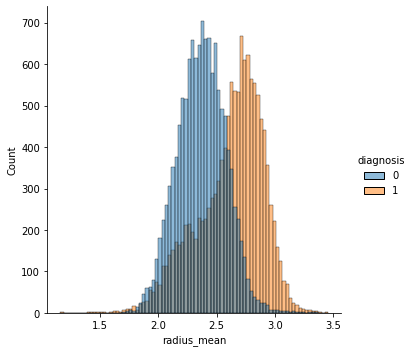

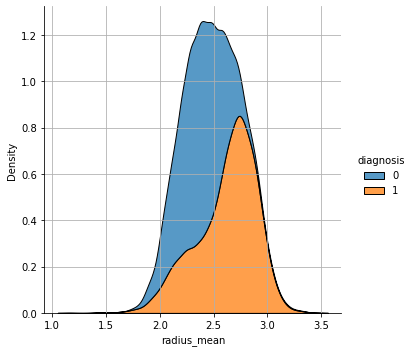

texture_mean


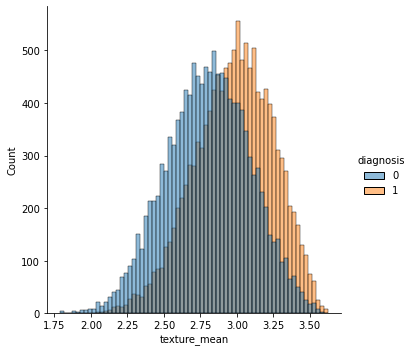

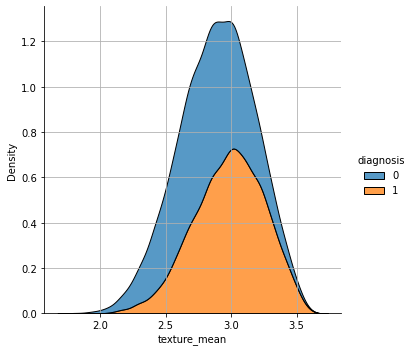

perimeter_mean


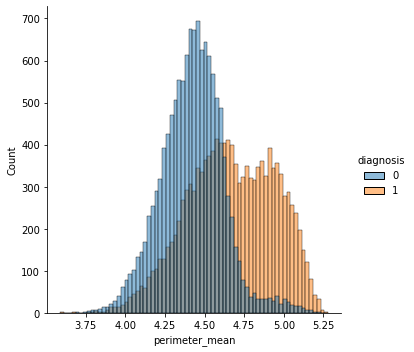

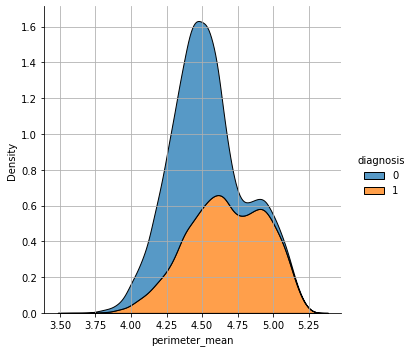

area_mean


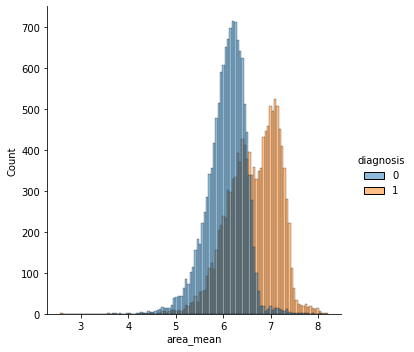

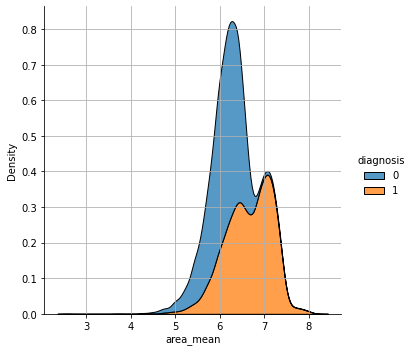

smoothness_mean


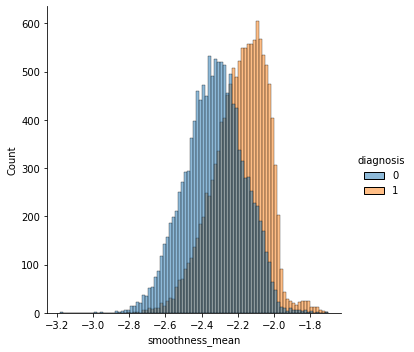

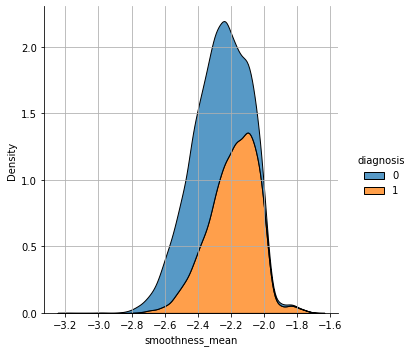

compactness_mean


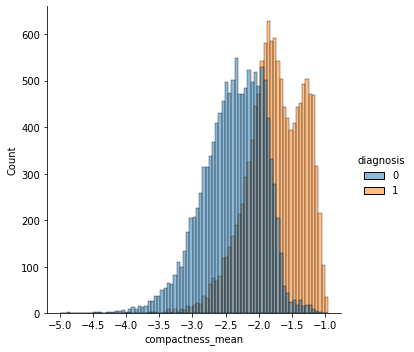

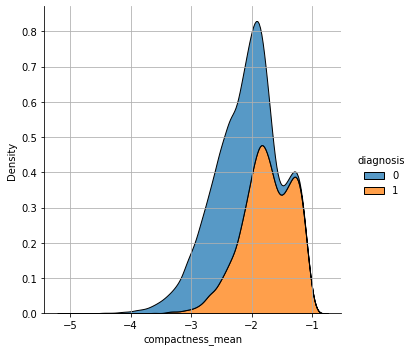

concavity_mean


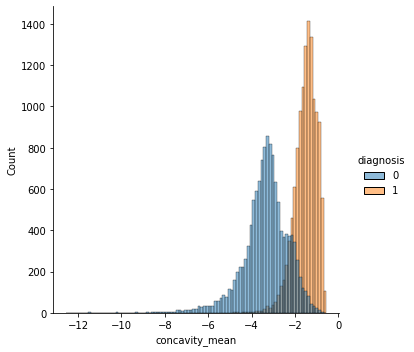

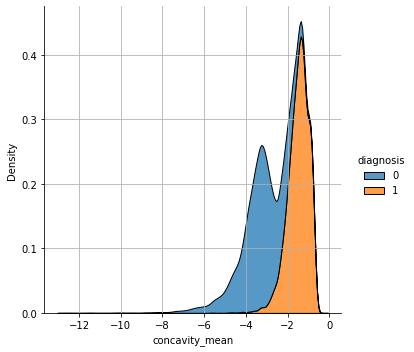

concave points_mean


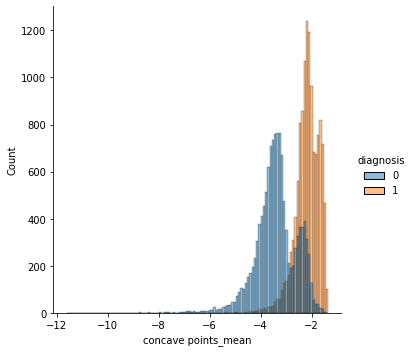

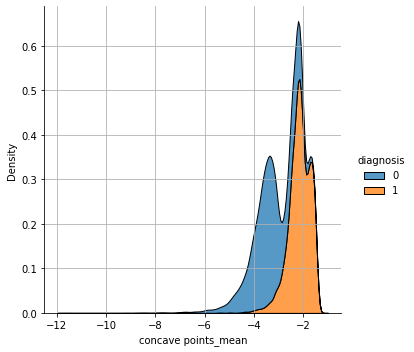

symmetry_mean


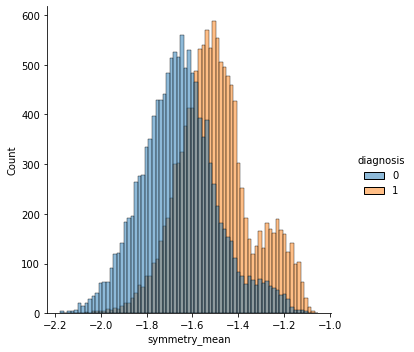

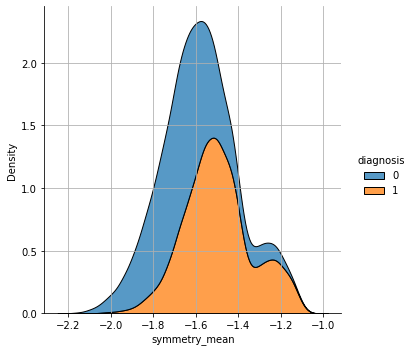

fractal_dimension_mean


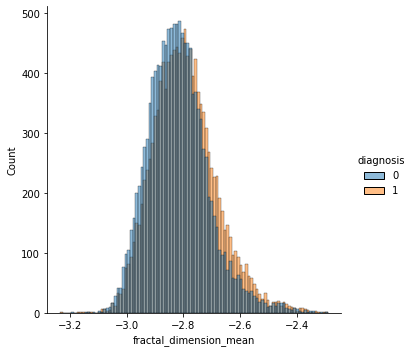

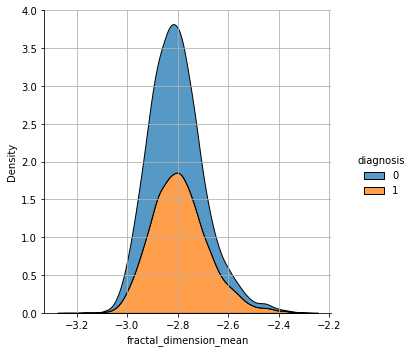

radius_se


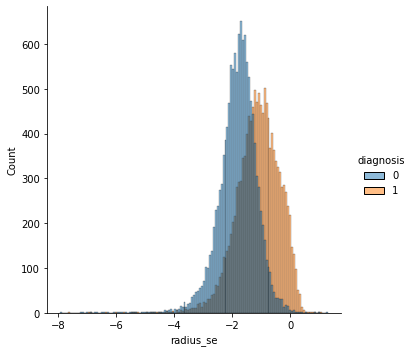

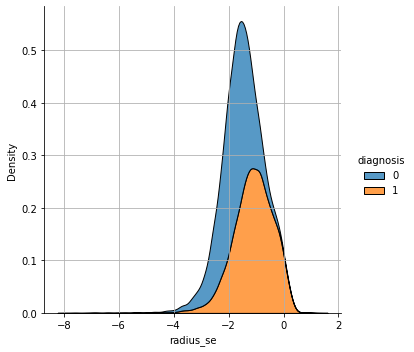

texture_se


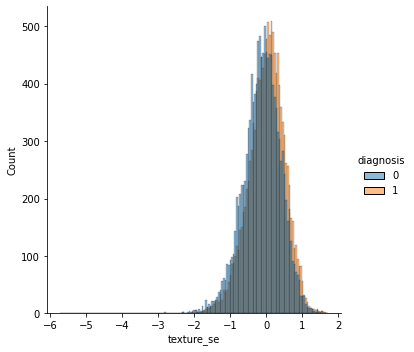

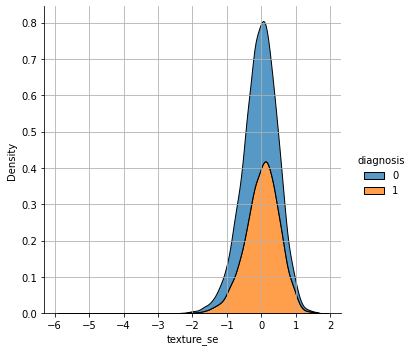

perimeter_se


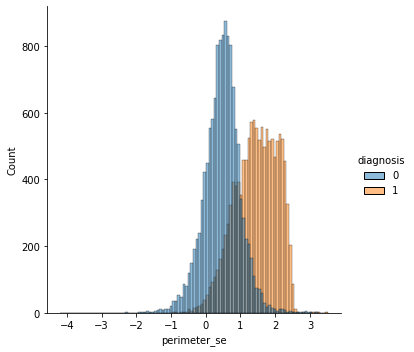

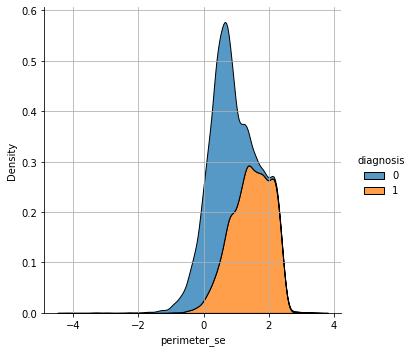

area_se


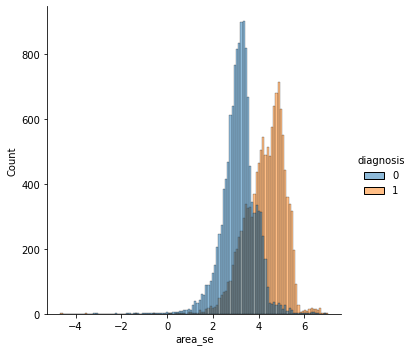

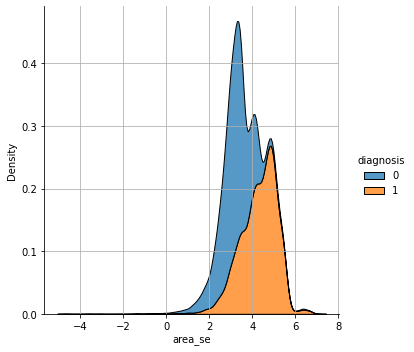

smoothness_se


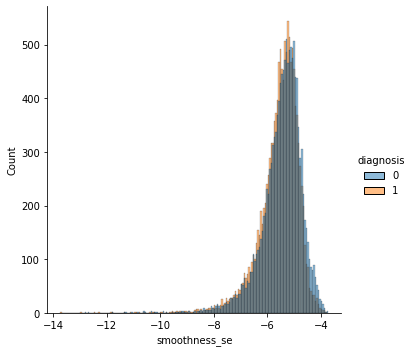

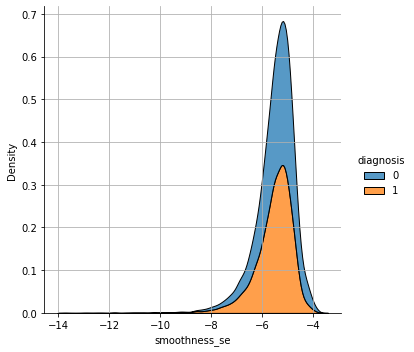

compactness_se


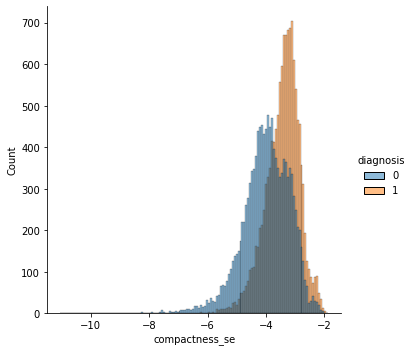

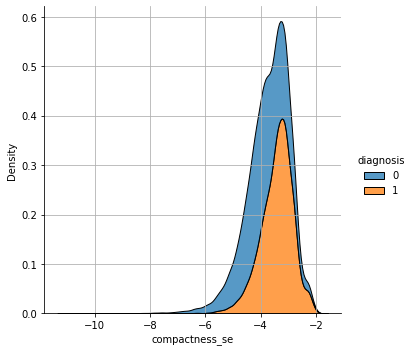

concavity_se


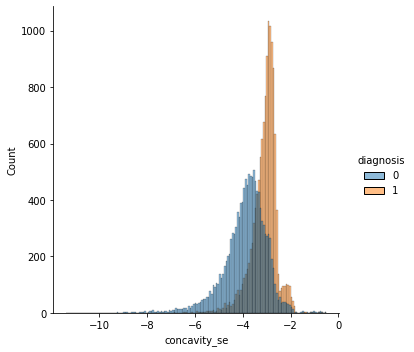

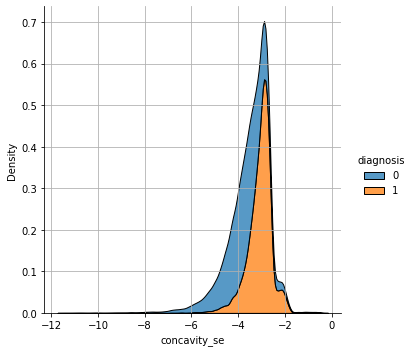

concave points_se


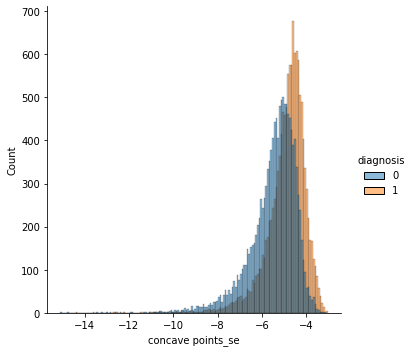

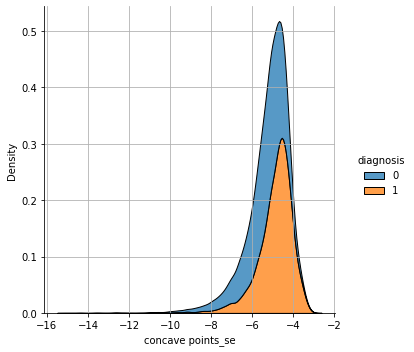

symmetry_se


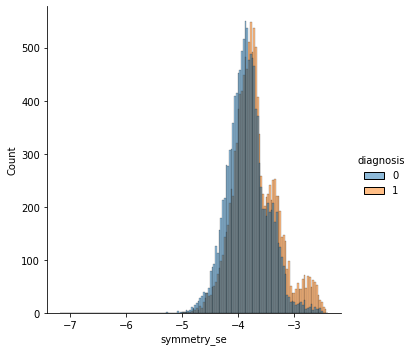

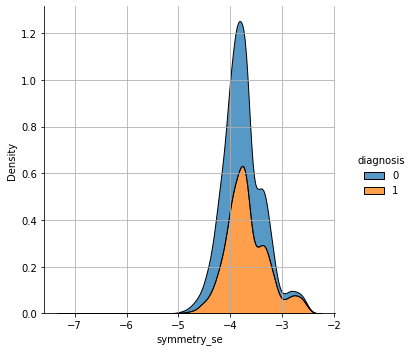

fractal_dimension_se


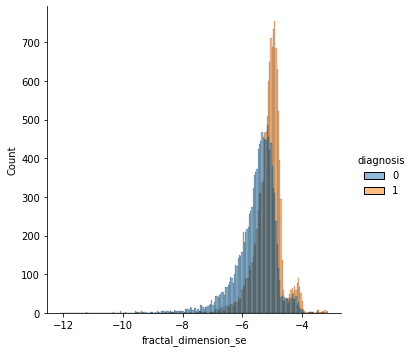

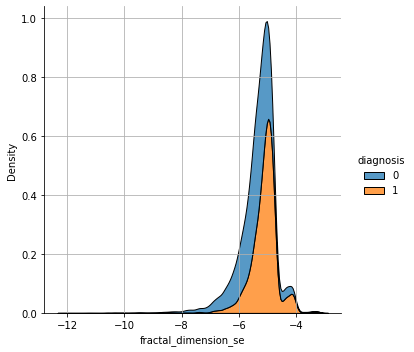

radius_worst


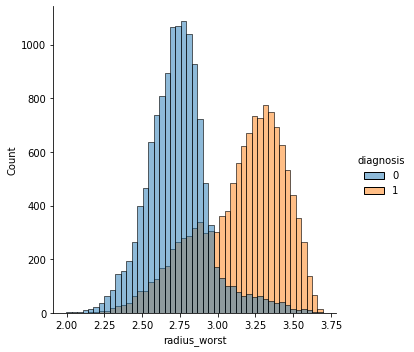

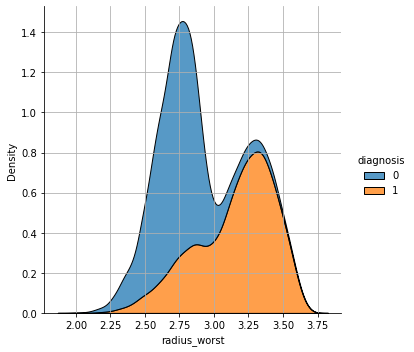

texture_worst


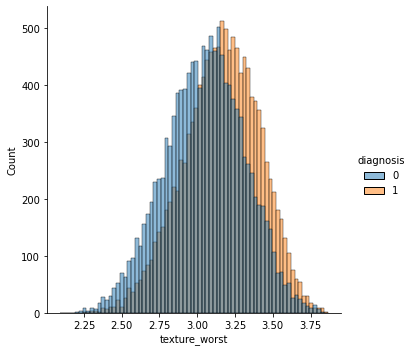

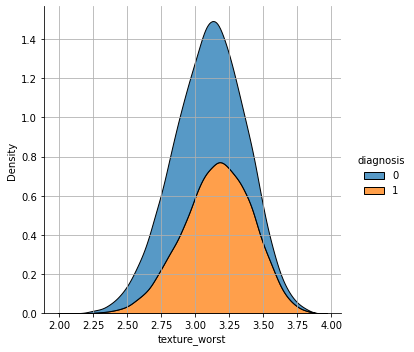

perimeter_worst


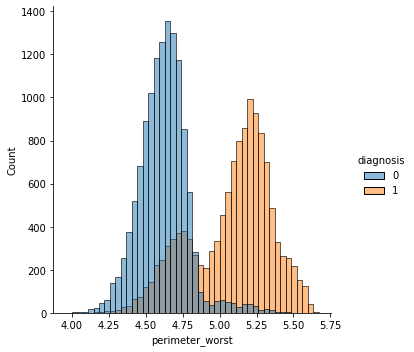

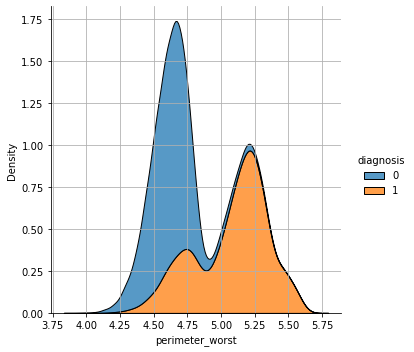

area_worst


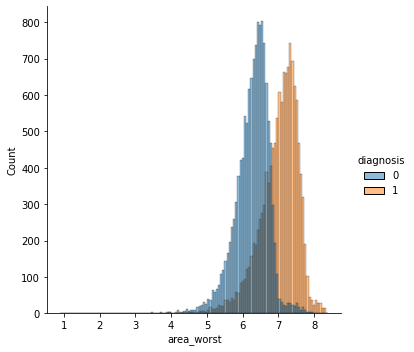

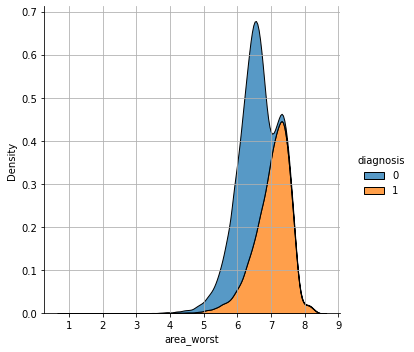

smoothness_worst


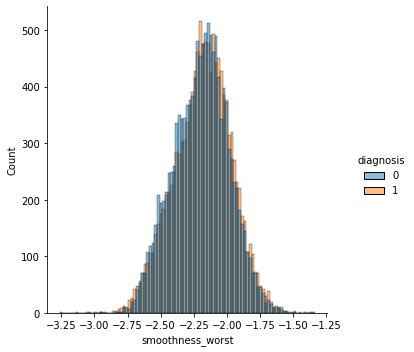

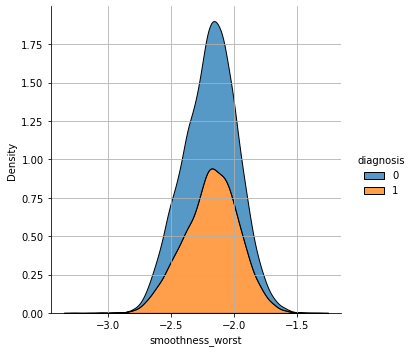

compactness_worst


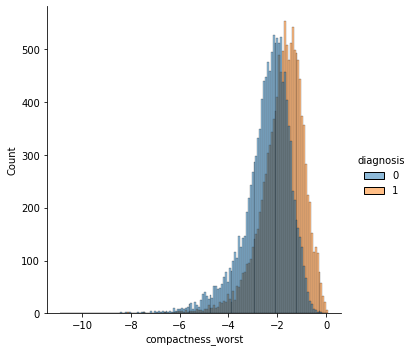

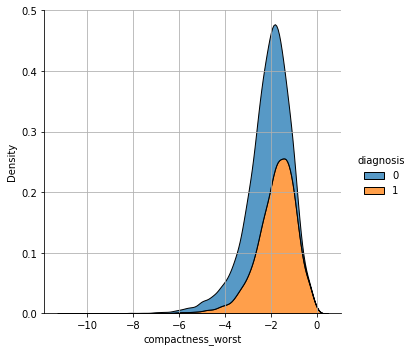

concavity_worst


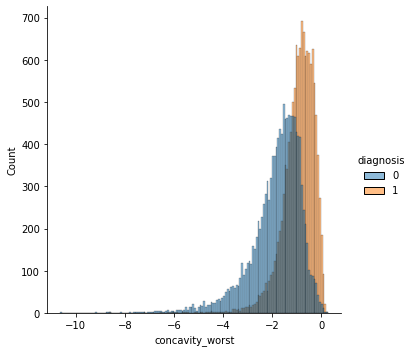

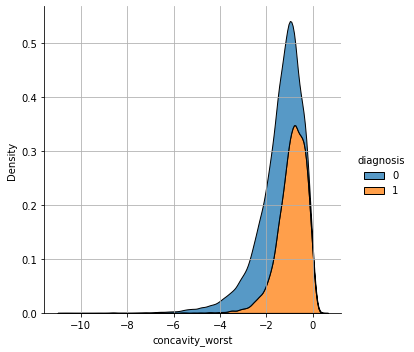

concave points_worst


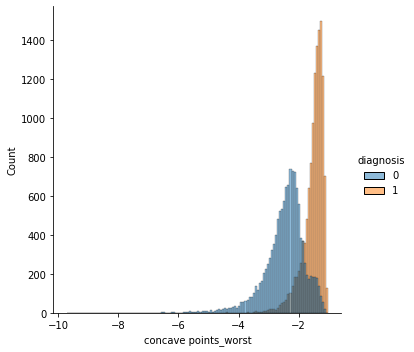

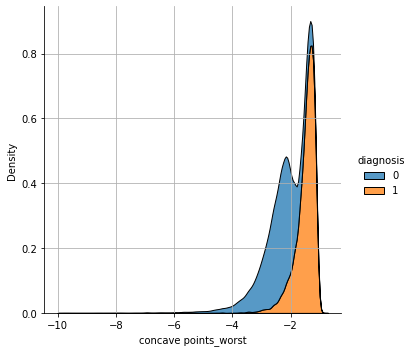

symmetry_worst


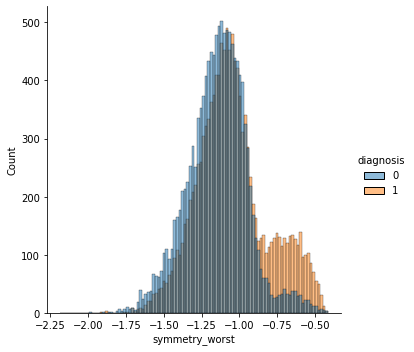

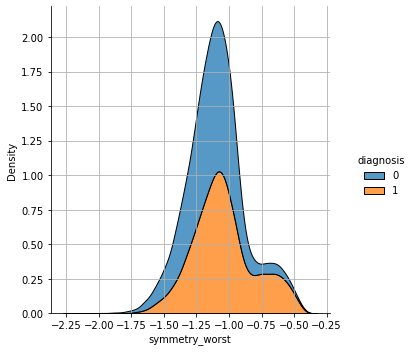

fractal_dimension_worst


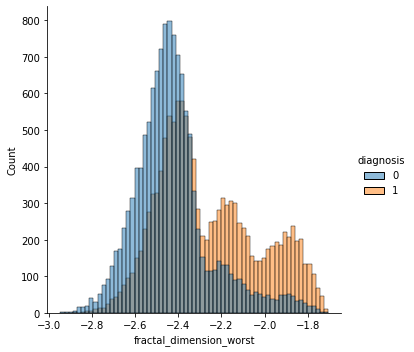

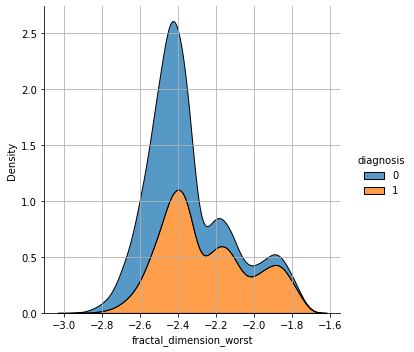

In [8]:
# Data Distribution 
for colm in data.select_dtypes(np.float_).columns:
    
    print(colm) 
    sns.displot(data, x = colm,  hue="diagnosis")
    sns.displot(data, x = colm,  hue="diagnosis", kind="kde", fill=True,  multiple="stack")
    plt.grid()
    plt.show()

# Handle Outliers

<p style="text-align: justify "> 
    <ol>
        <li>What is an Anomaly/Outlier? </li>
        <li>Why Care about Anomaly? </li>
        <li>Five Ways to detect Anomaly </li> 
            <ol>
                <li> Standard Deviation </li>
                <li> Boxplots </li>
                <li> DBScan Clustering </li>
                <li> Isolation Forest </li>
                <li> Robust Random Cut Forest </li>
            </ol>
    </ol>
</p>
(Badr, 2022)

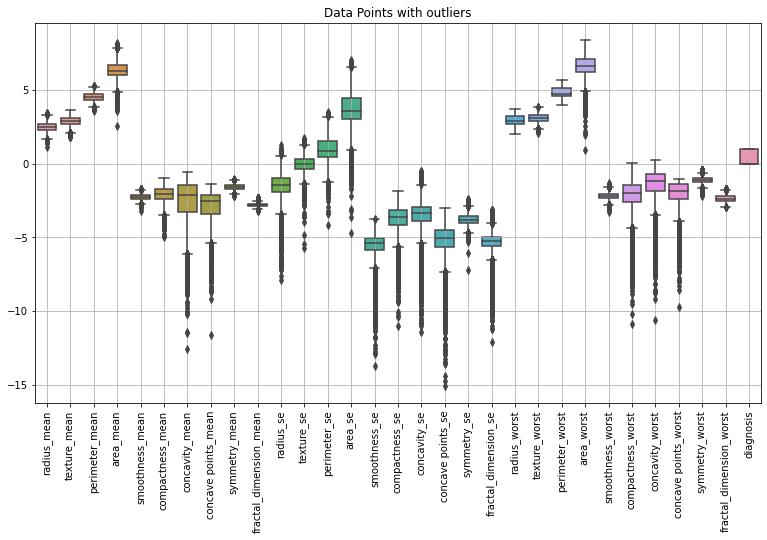

In [9]:
# Outlier Detection 
#Using Boxplot to display outliers present in the dataset

plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

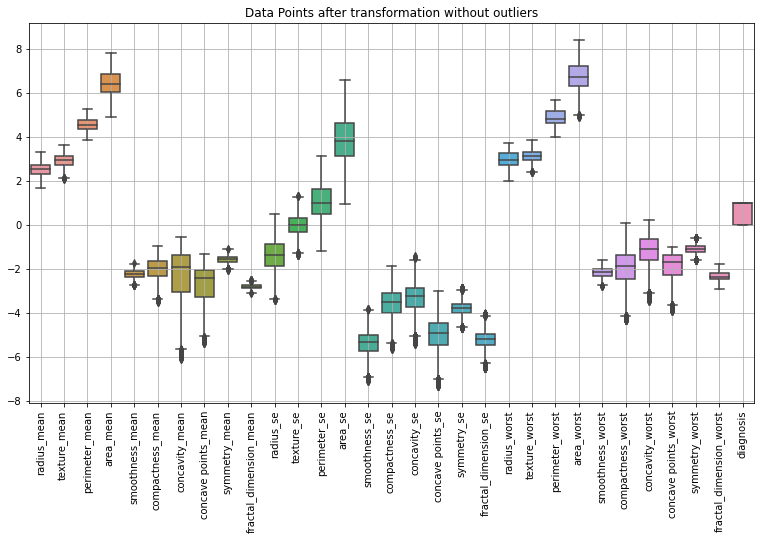

In [10]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset
plt.figure(figsize=(13,7))
plt.title("Data Points after transformation without outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

1    9174
0    6797
Name: diagnosis, dtype: int64



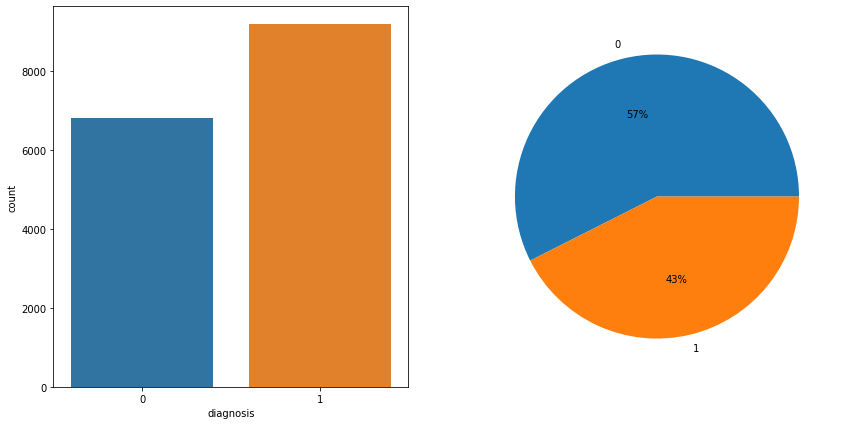

In [11]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

# Balance Output Data  

0    9174
1    9174
Name: diagnosis, dtype: int64



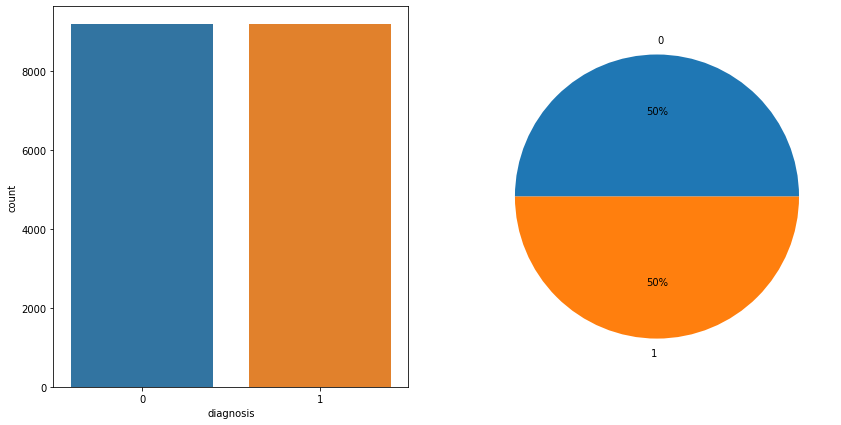

In [12]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(sampling_strategy= 1)

X , y = sampler.fit_resample(data.iloc[:,:-1].values , data.iloc[:,-1].values )


#
df = pd.DataFrame()
for i, fea in enumerate(data.iloc[:, :-1].columns):
    df[fea] = X[:, i]
df['diagnosis'] = y
data = df.copy()




# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

# Corelation Matrix

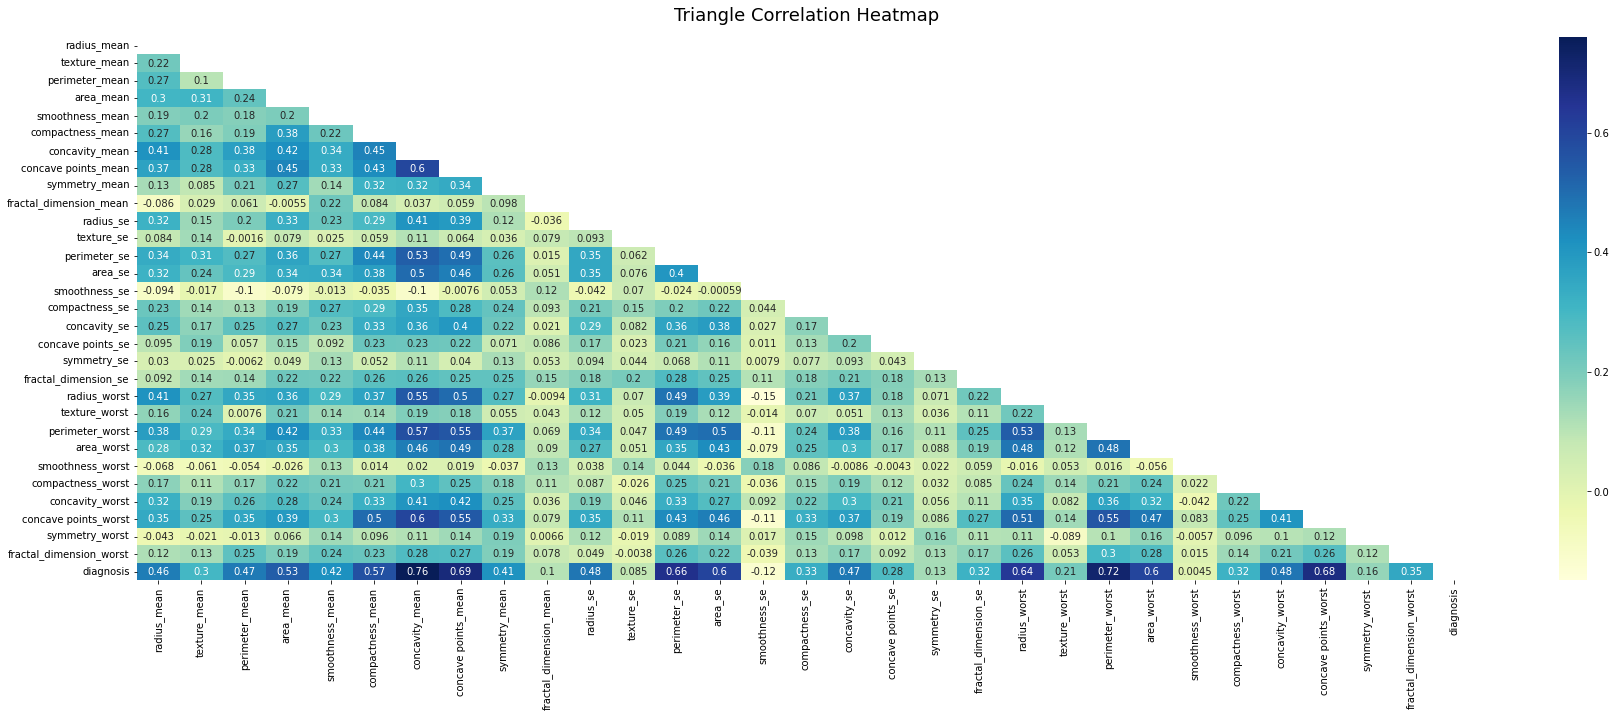

In [13]:
plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Feature Selection

# Feature Extraction 

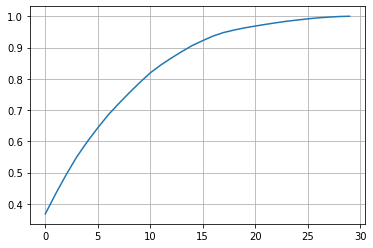

In [14]:
pca = PCA(n_components= None)
pca.fit_transform(data.iloc[:, :-1].values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [15]:
# cummuliative sum of varience 

np.cumsum(pca.explained_variance_ratio_)

array([0.36799855, 0.43301045, 0.49395952, 0.55044437, 0.59897594,
       0.64320077, 0.68475921, 0.72075043, 0.75534879, 0.78798897,
       0.81891844, 0.84390409, 0.86620533, 0.88681307, 0.9064071 ,
       0.92203411, 0.93688173, 0.94801395, 0.95594998, 0.96292119,
       0.96860538, 0.97411079, 0.97921415, 0.98392622, 0.98787602,
       0.99165885, 0.99487787, 0.99715669, 0.99914425, 1.        ])

In [16]:
n = 26

pca = PCA(n_components= n)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

DATA['Target'] = data.iloc[:, -1].values

data = DATA.copy()
DATA.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,Target
0,3.141337,-0.119991,0.462991,-0.231258,1.387735,1.585164,-0.543726,-0.781898,-0.769609,-0.736906,...,0.246498,0.060689,0.146504,0.023221,-0.338360,0.171271,0.019737,-0.103216,0.079157,0
1,0.571885,-1.000138,0.466645,-0.440252,0.015249,1.198665,1.460440,0.835781,1.489864,-0.091463,...,-0.074031,-0.067820,0.112751,0.029660,0.148533,0.352044,0.662067,-0.057069,-0.292730,1
2,3.643957,0.356915,-0.554762,-0.238202,-0.668901,-0.177244,-0.318072,0.675673,0.098953,0.191194,...,-0.267542,0.326206,-0.277636,0.072977,-0.170815,-0.053909,-0.101684,0.220297,-0.165375,0
3,-0.321777,-0.569808,-0.593597,-0.641137,0.454880,-0.711358,0.130646,0.140388,0.125199,0.271408,...,0.325684,0.390019,0.088286,0.140343,-0.280770,-0.320145,0.445943,-0.096289,-0.093140,0
4,-2.871897,0.457706,0.172254,0.047845,-0.581221,-0.143157,-0.563982,-0.080301,0.226136,0.446702,...,0.557828,0.126724,0.117842,-0.348502,0.020282,-0.298068,-0.279503,0.176948,-0.275185,1


In [17]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, :-1].values, data.iloc[:, -1].values, test_size=0.20)

# Step 4: Model Definition and Analysis

### 4.1 Define helper function 

In [18]:
# Collection of fpr and tpr for various models 
ROC_Values = dict()

def classification_Report(model ,y_pred, model_name):
    """
    input  : object of the model, predicted
    output : returns various metrics to understand model performance 
    """
    
    # sklearns classification report function
    print( classification_report(y_test ,y_pred) )
    
    # Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap((cf_matrix/np.sum(cf_matrix))*2 , annot=True, fmt='.2%', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
    hm.set_xlabel("Predicted Values", fontsize = 15)
    hm.set_ylabel("Actual Values", fontsize = 15)
    plt.show()
    
    
    # ROC curve 
    fpr, tpr, _  = roc_curve(y_test ,y_pred)
    
    if model_name not in ROC_Values.keys() :
        ROC_Values[model_name] = [fpr, tpr]

In [19]:
def model_Trainer(model_obj, model_name):
    """
    input:
        model_obj  : object of our model 
        model_name : string input 
    returns:
        Generates predictions and classification report
        trained model
    """
    model_obj.fit(X_train, y_train)
    
    y_pred = model_obj.predict(X_test)

    classification_Report(model_obj, y_pred ,model_name)
    
    return model_obj
    

### 4.2 Machine Learning Approaches

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1813
           1       0.96      0.96      0.96      1857

    accuracy                           0.96      3670
   macro avg       0.96      0.96      0.96      3670
weighted avg       0.96      0.96      0.96      3670



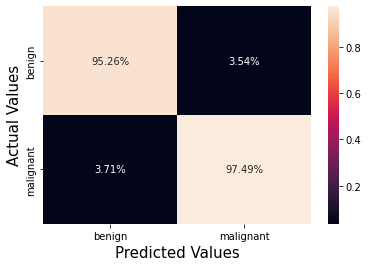

In [20]:
Decision_Tree = DecisionTreeClassifier()

Decision_Tree = model_Trainer(Decision_Tree , "Decision_Tree")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1813
           1       0.98      0.98      0.98      1857

    accuracy                           0.98      3670
   macro avg       0.98      0.98      0.98      3670
weighted avg       0.98      0.98      0.98      3670



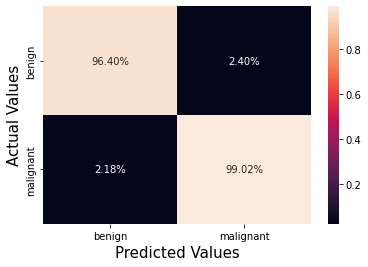

In [21]:
# Create a object of model
Random_Forest = RandomForestClassifier()

# Train the model and generate report
Decision_Tree_Tuned = model_Trainer(Random_Forest, "Random_Forest")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1813
           1       0.98      0.98      0.98      1857

    accuracy                           0.98      3670
   macro avg       0.98      0.98      0.98      3670
weighted avg       0.98      0.98      0.98      3670



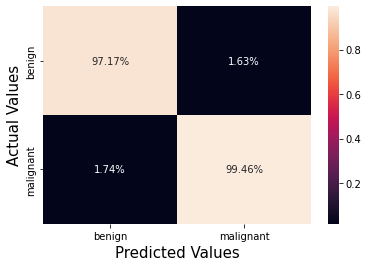

In [22]:
svm_classifier = SVC(probability=True)

# Train the model and generate report
svm_classifier = model_Trainer(svm_classifier, "svm_classifier")

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1813
           1       0.98      0.97      0.98      1857

    accuracy                           0.98      3670
   macro avg       0.98      0.98      0.98      3670
weighted avg       0.98      0.98      0.98      3670



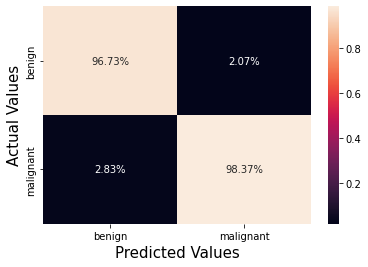

In [23]:
AdaBoost_Classifier = AdaBoostClassifier()

AdaBoost_Classifier = model_Trainer(AdaBoost_Classifier, "AdaBoost_Classifier")

# Model Comparison

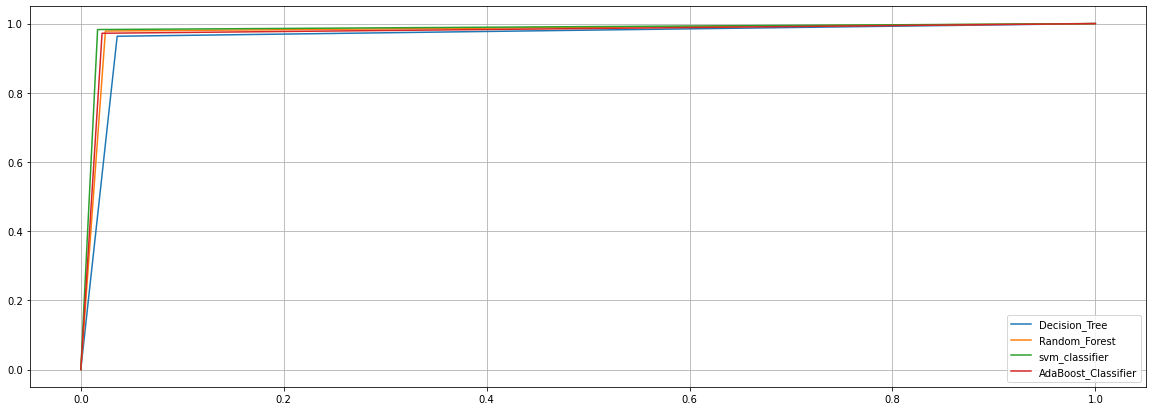

In [24]:
plt.figure(figsize= (20,7))

for i in ROC_Values.keys():
    plt.plot(ROC_Values[i][0], ROC_Values[i][1], label= i)
    plt.legend()

plt.grid()
plt.show()

### 4.3 deep Learning Approaches

In [25]:
# convert the data from the numpy array to tensor

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float().reshape(-1,1)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float().reshape(-1,1)

In [26]:
# Convert the splitted data of tensors to TensorDataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# From the tensordata set to mini batches 
train_data = DataLoader( train_data, 
                        batch_size= int(X_train.shape[0]/8),  # the data set will be devided into 8 equal mini batches
                       shuffle= True, 
                       drop_last= True)

test_data = DataLoader( test_data, shuffle= True )

In [27]:
# building ann classifier class 

class ANNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input layer
        self.input = nn.Linear(X_train.shape[1], 16)
        
        # dense layers 
        self.dense_1 = nn.Linear(16, 32)
        self.dense_1_BN = nn.BatchNorm1d(32)
        
        self.dense_2 = nn.Linear(32, 64)
        self.dense_2_BN = nn.BatchNorm1d(64)
        
        self.dense_3 = nn.Linear(64, 128)
        self.dense_3_BN = nn.BatchNorm1d(128)
        
        # output layer
        self.output = nn.Linear(128,1)
        
    def forward(self,x):
        
        # input layer
        x = F.leaky_relu(self.input(x))
        # dense layer 1 
        x = self.dense_1(x)
        x = F.leaky_relu(self.dense_1_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
        
        
        # dense layer 2
        x = self.dense_2(x)
        x = F.leaky_relu(self.dense_2_BN(x))
        x = F.dropout(x, p = 0.6 , training= self.training )
        
        # dense layer 3 
        x = self.dense_3(x)
        x = F.leaky_relu(self.dense_3_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
    
        # output layer
        x = torch.sigmoid( self.output(x) )
       
        
        return x

In [28]:
# create a instance of a class
model = ANNClassifier()

# loss function 
loss_fun = nn.BCELoss()

# optimizer 
optimizer = torch.optim.Adam(model.parameters())  # L2 regularization

In [29]:
def model_train_and_validation(model, epoch):
    
    train_acc = []
    test_acc = []
    train_loss = [] #torch.zeros(epoch)
    
    # loop over every epoch
    for epochi in range(epoch):
        
        # loop over traing data batches
        bach_acc = []
        bach_loss = []
        for x,y in train_data: 
            
            # forward propogation
            yHat = model(x) 
            
            # loss 
            loss = loss_fun(yHat, y)
            bach_loss.append(loss.detach().numpy())
            
            
            # back propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            # compute batch accuracy 
            bach_acc.append( torch.mean(((model(x)>.5) == y).float()) )
            
            
        # compute training accuracy and loss
        train_acc.append(np.mean(bach_acc))
        train_loss.append( np.mean(bach_loss) )
        
        # evaluation mode on
        model.eval()
        
        x,y = next(iter( test_data ) )
        yHat = model(x)
        test_acc.append( ((model(x)>.5) == y).float()) 
        
        # model back to train mode
        model.train()
        
        print(f" Epoch : {epochi}, Train Acc : {train_acc[epochi]}, Train Loss : {train_loss[epochi]},  ")
        
    model.eval()  
    return train_acc, train_loss, test_acc

In [30]:
train_acc, train_loss, test_acc = model_train_and_validation(model, 30)

 Epoch : 0, Train Acc : 0.6500817537307739, Train Loss : 0.6483628749847412,  
 Epoch : 1, Train Acc : 0.8109323978424072, Train Loss : 0.5045332908630371,  
 Epoch : 2, Train Acc : 0.8857687711715698, Train Loss : 0.3799618184566498,  
 Epoch : 3, Train Acc : 0.9277535676956177, Train Loss : 0.276464581489563,  
 Epoch : 4, Train Acc : 0.9490185379981995, Train Loss : 0.20350654423236847,  
 Epoch : 5, Train Acc : 0.960128128528595, Train Loss : 0.15977910161018372,  
 Epoch : 6, Train Acc : 0.9649672508239746, Train Loss : 0.12668660283088684,  
 Epoch : 7, Train Acc : 0.9719874858856201, Train Loss : 0.10492169111967087,  
 Epoch : 8, Train Acc : 0.9749182462692261, Train Loss : 0.0912054032087326,  
 Epoch : 9, Train Acc : 0.9755997657775879, Train Loss : 0.08343441784381866,  
 Epoch : 10, Train Acc : 0.977780818939209, Train Loss : 0.07919006049633026,  
 Epoch : 11, Train Acc : 0.9794846773147583, Train Loss : 0.0721764862537384,  
 Epoch : 12, Train Acc : 0.9796892404556274, Tr

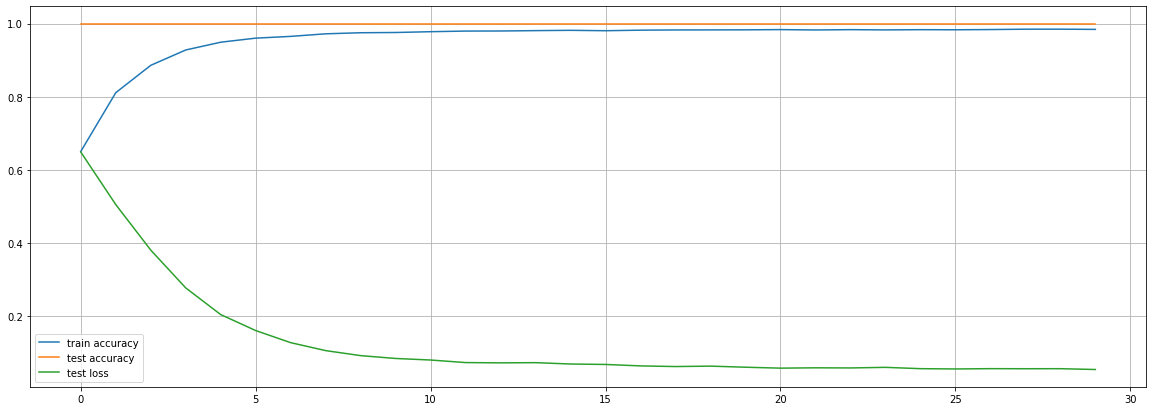

In [31]:
plt.figure(figsize= (20,7))

plt.plot(train_acc, label = "train accuracy")
plt.plot(test_acc, label = "test accuracy")
plt.plot( train_loss, label = "test loss" )
plt.legend()
plt.grid()
plt.show()

# Generate Predictions 

In [32]:
# Load the test data points 

df = pd.read_csv("Dataset/test_100r.csv")
Id = df.iloc[:, 0].values.astype(np.int32)
df.drop( labels= ['id'], axis= 1, inplace= True )
df = df.dropna()
df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,68.532774,195.624827,0.078282,0.133505,0.030642,0.025076,0.199481,0.054877,...,12.483659,11.961359,85.471488,148.016468,0.087666,0.046050,0.289351,0.038040,0.349355,0.074248
1,7.107375,15.895246,93.288227,450.381515,0.100320,0.045394,0.018209,0.010265,0.178165,0.057009,...,17.676051,20.864080,100.798972,817.094638,0.075030,0.180301,0.492751,0.096460,0.395112,0.098559
2,11.575929,20.435897,108.126199,1316.008018,0.109270,0.345116,0.412742,0.165474,0.215813,0.059694,...,13.035890,19.029690,108.220078,1145.478120,0.082662,0.037770,0.424392,0.219969,0.503064,0.093896
3,17.049499,17.189036,122.326677,1042.768588,0.134032,0.093098,0.070388,0.078683,0.244361,0.066792,...,16.751836,24.928188,91.684245,947.978048,0.103626,0.631425,0.252219,0.032718,0.268289,0.082652
4,10.815883,16.936336,91.779285,1117.781440,0.110550,0.203851,0.318877,0.050364,0.232977,0.058317,...,16.795885,20.591944,114.458955,683.021463,0.181860,0.170216,0.508757,0.161784,0.574045,0.091577


In [33]:
# Data Normalisation 
df_fea = df.columns
df[df_fea] = df[df_fea].apply(np.log)

In [34]:


most_valued_data_points = pca.transform(df.iloc[:, :].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )


df = DATA.copy()

In [35]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

res['diagnosis'] = pd.DataFrame(   model(torch.tensor(df.values).float()).detach().numpy()  )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'neural_network_1.csv' , index = False)